In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()  #Basic informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#checking which are categorical columns

for feature in df.columns:
    if df[feature].dtype not in ['int64', 'float64']:    #dtype means datatype
        print(f"{feature}:{df[feature].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [4]:
#changing total charges column to float since total charges actually looks like number ;)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df.dropna()  #Dropping null values
df = df.drop(['customerID'], axis = 1)  #dropping customer id because it is irrelevant for modelling

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [5]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [6]:
df.head()  #To check if properly encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


<AxesSubplot:>

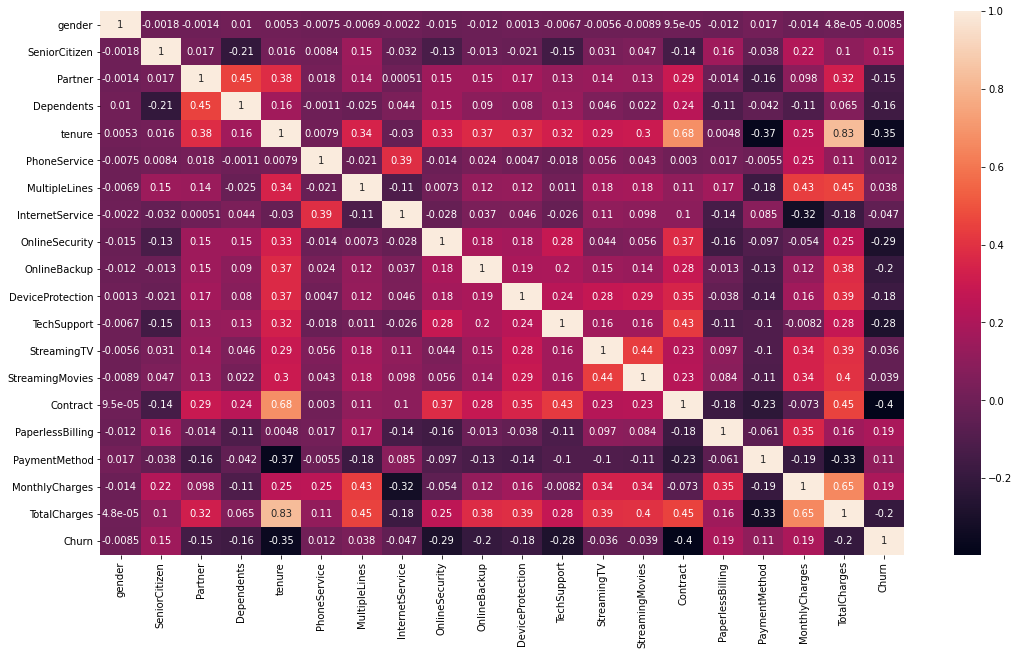

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))

sns.heatmap(df.corr(), annot =True)   #Basic correlation plot to understand which features are correlated

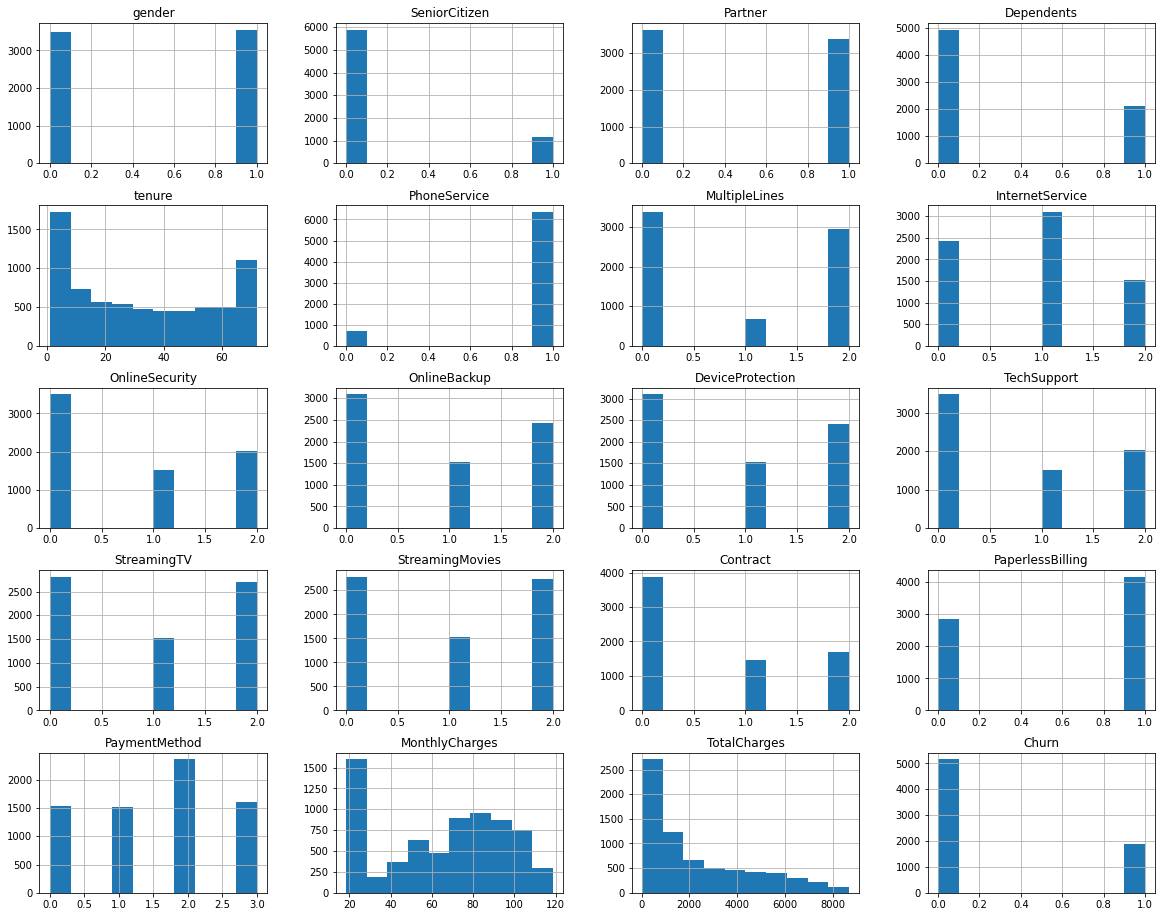

In [9]:
df.hist(figsize=(20,16))
plt.show()  #showing the charts of different columns
#This also helps in finding number of counts in each column

Data is highly imbalanced since Customer churn column has 1 values less than 2000, and 0 value more than 5000. Imbalance is same for phone service and online backup!

In [10]:
zero  = df[df['Churn']==0]   #zero values in outcome column
one = df[df['Churn']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 5000) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

Churn column handled, let's do it for Phoneservice

In [11]:
zero  = df[df['PhoneService']==0]   #zero values in outcome column
one = df[df['PhoneService']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_upsampled = resample(zero, replace = True, n_samples = 6000) 
#concatenate
df = pd.concat([one, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

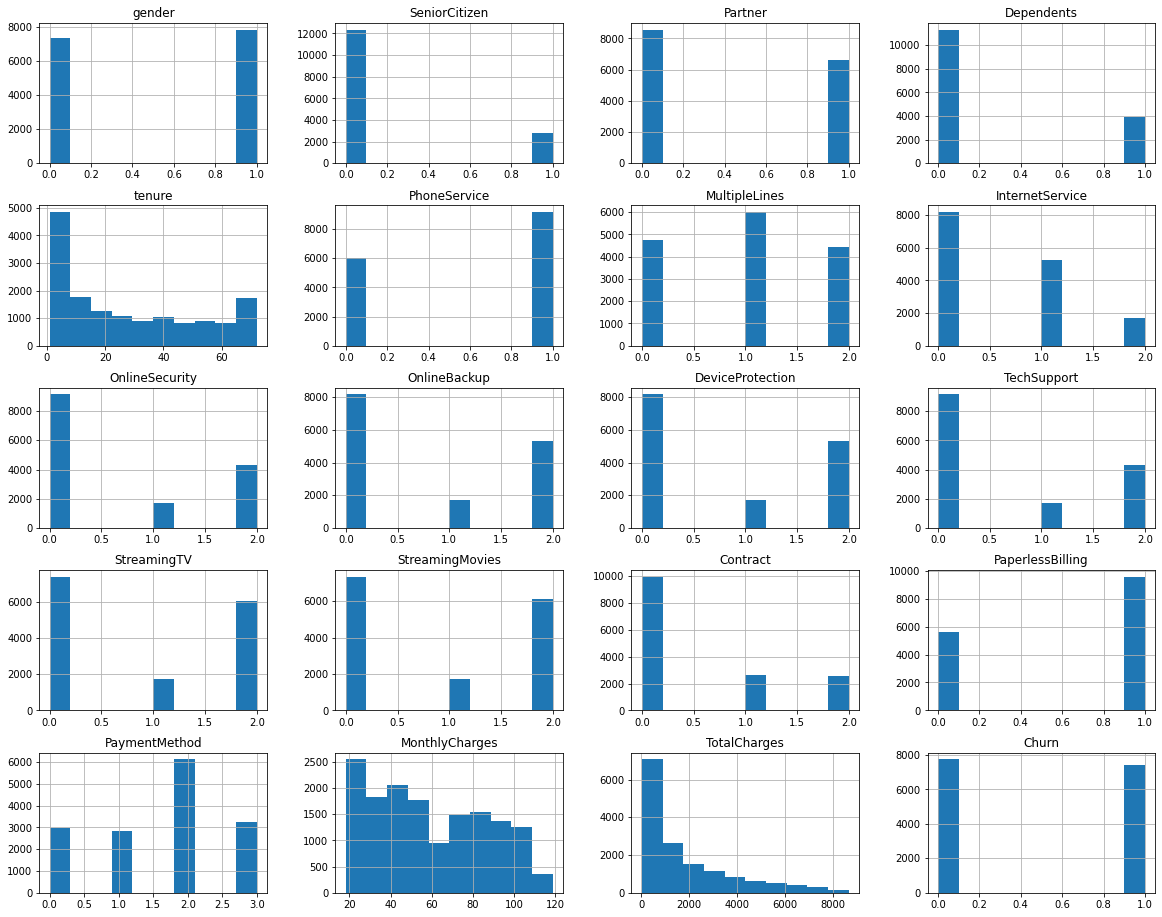

In [12]:
df.hist(figsize=(20,16))
plt.show()

In [13]:
#Checking which columns are mostly correlated with the target
df.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.482055
tenure              0.419789
OnlineSecurity      0.323913
TechSupport         0.314974
TotalCharges        0.258443
Dependents          0.227675
DeviceProtection    0.204175
PaperlessBilling    0.202711
OnlineBackup        0.190271
Partner             0.171636
SeniorCitizen       0.165173
MonthlyCharges      0.128362
PaymentMethod       0.126095
MultipleLines       0.045511
StreamingMovies     0.044647
StreamingTV         0.038426
InternetService     0.032495
gender              0.022036
PhoneService        0.008940
Name: Churn, dtype: float64

In [14]:
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen', 'MonthlyCharges',
       'PaymentMethod', 'Partner', 'PhoneService']] #taking only relevant columns
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')
#eval metric is auc because for classification auc metric is best
#XGBoost
#parameters for xgboost

params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}
gs_xgb =  GridSearchCV(xgb, param_grid=params_xgb, cv=5)
gs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", gs_xgb.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 400}


In [31]:
#got the best parameters above
xgb = XGBClassifier(learning_rate = 0.3, max_depth = 25, n_estimators = 400,
                    eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=25, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [34]:
y_pred = xgb.predict(X_test)
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1551
           1       0.91      0.96      0.94      1484

    accuracy                           0.94      3035
   macro avg       0.94      0.94      0.94      3035
weighted avg       0.94      0.94      0.94      3035



# 94% accuracy XGBOOST

## Do upvote if you like it or fork it, this helps us to get motivated and work more :)